In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [98]:
bikeShare=pd.read_csv('bikesharing.csv')

bikeShare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [99]:
# dropping columns
bikeShare.drop(['dteday','instant','casual','registered'], axis=1, inplace=True)
bikeShare.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Weekday_Name
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,Monday
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,Tuesday
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,Wednesday
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,Thursday
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,Friday


In [100]:
# mapping the labels for days
def weekdayName(value):
    if value =="Monday":
        return 1
    elif value =="Tuesday":
        return 2
    elif value == "Wednesday":
        return 3
    elif value == "Thursday":
        return 4
    elif value == "Friday":
        return 5
    elif value == "Saturday":
        return 6
    elif value == "Sunday":
        return 7

bikeShare.weekday=bikeShare.Weekday_Name.apply(lambda x: weekdayName(x))

In [101]:
# mapping labels for weather
def weatherMap(value):
    if value==1:
       return 'Clear'
    elif value==2:
        return 'Cloudy'
    elif value==3:
        return 'Snow'
    elif value==4:
        return 'Rainy'

bikeShare.weathersit=bikeShare.weathersit.apply(lambda x: weatherMap(x))

In [102]:
# mapping labels for seasons
def seasonMap(value):
    if value==1:
        return 'spring'
    elif value==2:
        return 'summer'
    elif value==3:
        return 'fall'
    elif value==4:
        return 'winter'
    
bikeShare.season=bikeShare.season.apply(lambda x: seasonMap(x))

In [103]:
bikeShare.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

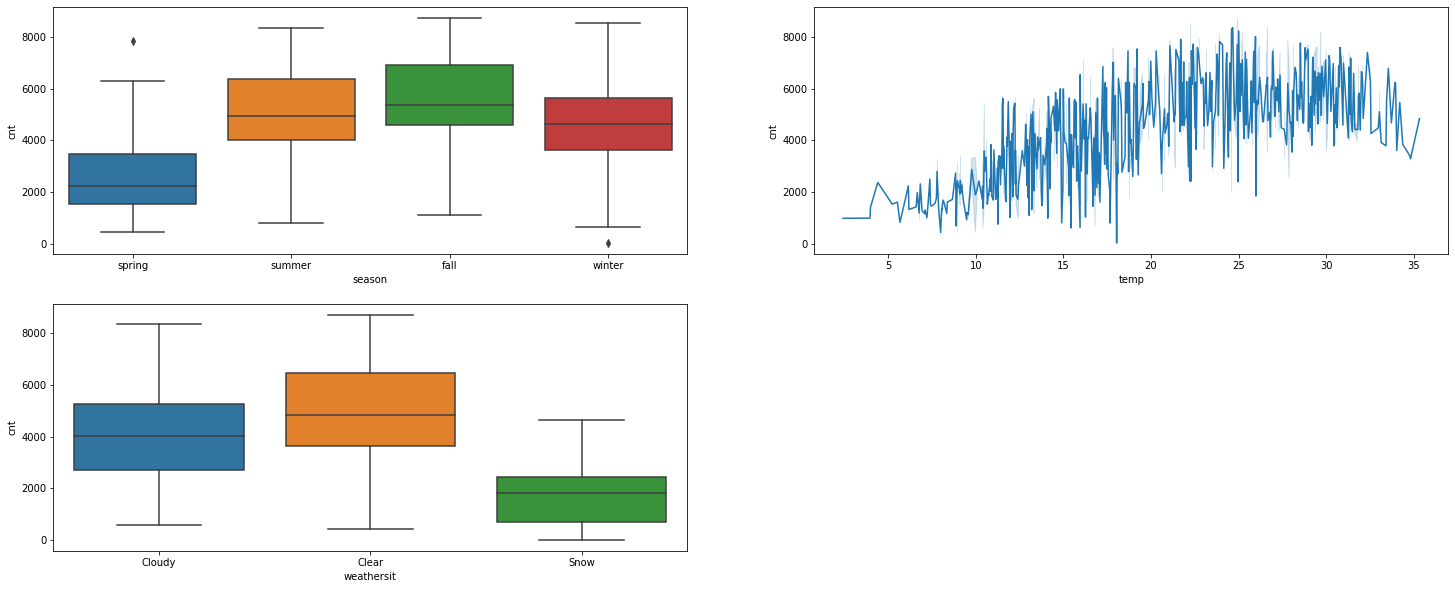

In [104]:
# relationship of some variables with count (demand of bike)
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
sns.boxplot(data=bikeShare, x='season', y='cnt')

plt.subplot(2,2,2)
sns.lineplot(data=bikeShare, x='temp', y='cnt')

plt.subplot(2,2,3)
sns.boxplot(data=bikeShare, x='weathersit', y='cnt')
plt.show()

In [105]:
# dummy variables created for the season
season_dummies=pd.get_dummies(bikeShare.season)
bikeShare=pd.concat([bikeShare, season_dummies],axis=1)


In [106]:
# dummy variables for weather and then dropping the columns
weather_dummies=pd.get_dummies(bikeShare.weathersit)
bikeShare=pd.concat([bikeShare, weather_dummies],axis=1)
bikeShare.drop(['weathersit','season','Weekday_Name'], inplace=True, axis=1)

# Data split

In [107]:
bs_train, bs_test=train_test_split(bikeShare, train_size=0.7, test_size=0.3, random_state=100)

In [108]:
print(bs_train.shape)
print(bs_test.shape)

(510, 17)
(219, 17)


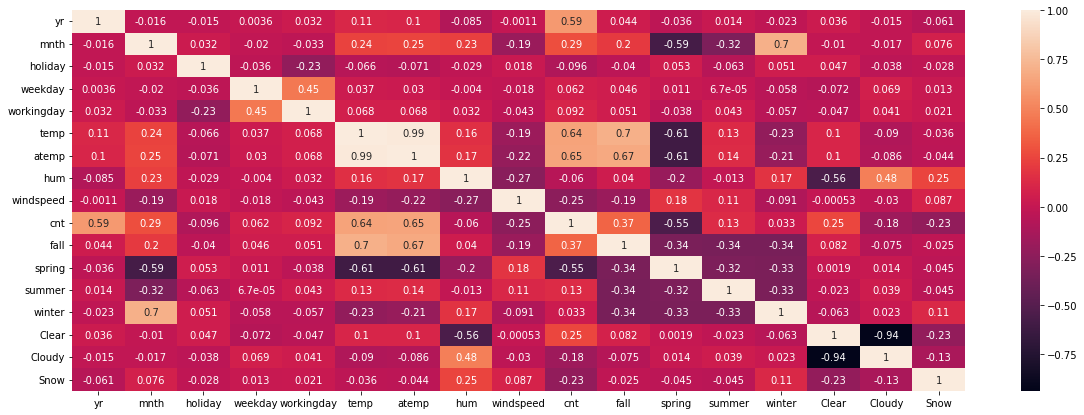

In [109]:
# heatmap to identify the correlation between various variables

plt.figure(figsize=(20,7))
sns.heatmap(data=bs_train.corr(), annot=True)
plt.show()

# Re Scaling Count attribute (min - max scaling)

# $ z= \frac {x- min(x)} {max(x)-min(x)}$

In [110]:
scaler= MinMaxScaler()
bs_train[['cnt']]=scaler.fit_transform(bs_train[['cnt']])

In [111]:
# splitting X_train and y_train
y_train=bs_train.pop('cnt')
X_train=bs_train

In [112]:
def createModel(xTrainData, yTrainData):
    X_train_lm = sm.add_constant(xTrainData)
    lr=sm.OLS(yTrainData, X_train_lm).fit()
    return lr

def getVIF(xTrainData, dataFrame):    
    dataFrame['Features']=xTrainData.columns
    dataFrame['VIF']=[variance_inflation_factor(xTrainData.values, i) for i in range(xTrainData.shape[1])]    
    return dataFrame

# MODEL -1

In [113]:
lr_1= createModel(X_train, y_train)
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     173.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.15e-180
Time:                        17:16:52   Log-Likelihood:                 491.63
No. Observations:                 510   AIC:                            -953.3
Df Residuals:                     495   BIC:                            -889.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0926      0.026      3.624      0.0

## Create Dataframe for all features and their VIF calculated as 
# $ VIF_i = \frac 1 {1 - R_i^2} $


In [114]:
vif=pd.DataFrame()
getVIF(X_train, vif).sort_values(by='VIF', ascending=False)

,Features,VIF
9,fall,inf
10,spring,inf
11,summer,inf
12,winter,inf
13,Clear,inf
14,Cloudy,inf
15,Snow,inf
5,temp,57.974395
6,atemp,53.517892
1,mnth,3.898910


# MODEL -2
## Dropping variable atemp as it has high VIF and low significance

In [115]:
X_train.drop('atemp', axis=1, inplace=True)

lr_2= createModel(X_train, y_train)
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.3
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          8.73e-182
Time:                        17:16:52   Log-Likelihood:                 491.57
No. Observations:                 510   AIC:                            -955.1
Df Residuals:                     496   BIC:                            -895.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0939      0.025      3.721      0.0

In [116]:
vif=pd.DataFrame()
getVIF(X_train, vif).sort_values(by='VIF', ascending=False)

,Features,VIF
8,fall,inf
9,spring,inf
10,summer,inf
11,winter,inf
12,Clear,inf
13,Cloudy,inf
14,Snow,inf
1,mnth,3.898884
5,temp,3.512311
6,hum,1.894631


# Model-3
## Dropping column 'fall' as it has low significance when compared to others

In [117]:
X_train.drop('fall', axis=1, inplace=True)
lr_3= createModel(X_train, y_train)
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.3
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          8.73e-182
Time:                        17:16:52   Log-Likelihood:                 491.57
No. Observations:                 510   AIC:                            -955.1
Df Residuals:                     496   BIC:                            -895.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0997      0.034      2.956      0.0

In [118]:
vif=pd.DataFrame()
getVIF(X_train, vif).sort_values(by='VIF', ascending=False)

,Features,VIF
11,Clear,63.521466
12,Cloudy,40.196540
8,spring,5.723399
13,Snow,4.854618
1,mnth,3.898884
10,winter,3.722607
5,temp,3.512311
9,summer,2.603964
6,hum,1.894631
4,workingday,1.342115


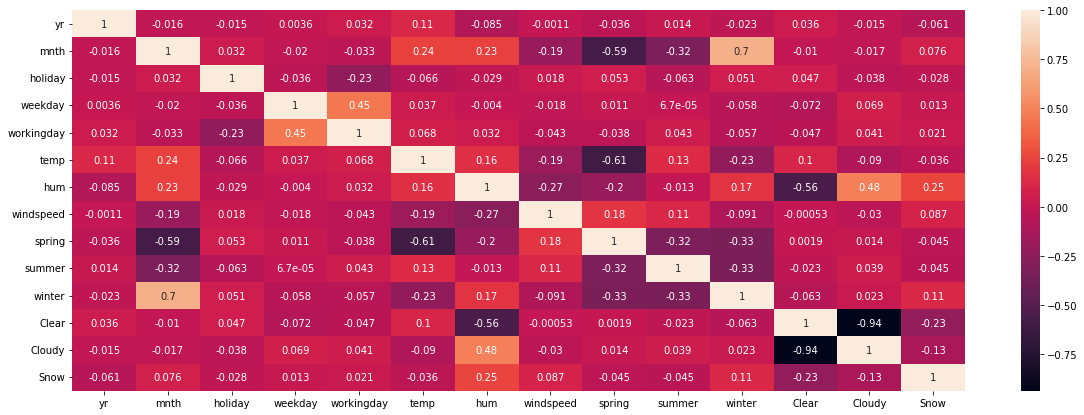

In [119]:
plt.figure(figsize=(20,7))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

# Model- 4
## Dropping attribute workingday as it has low significance when compared to others

In [120]:
X_train.drop('workingday', axis=1, inplace=True)
lr_4= createModel(X_train, y_train)
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     203.2
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          7.05e-183
Time:                        17:16:53   Log-Likelihood:                 491.40
No. Observations:                 510   AIC:                            -956.8
Df Residuals:                     497   BIC:                            -901.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1012      0.034      3.009      0.0

In [121]:
vif=pd.DataFrame()
getVIF(X_train, vif).sort_values(by='VIF', ascending=False)

,Features,VIF
10,Clear,63.121111
11,Cloudy,39.991852
7,spring,5.718268
12,Snow,4.833560
1,mnth,3.892833
9,winter,3.722585
4,temp,3.512295
8,summer,2.603829
5,hum,1.893456
6,windspeed,1.195642


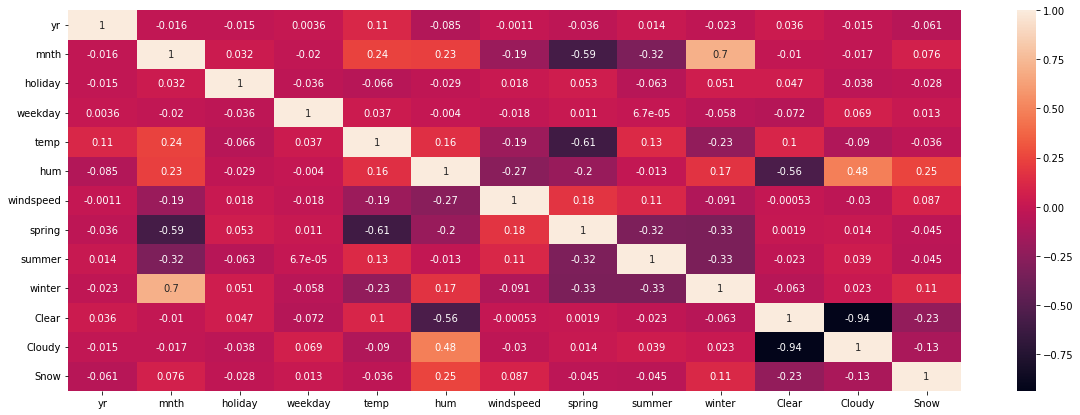

In [122]:
plt.figure(figsize=(20,7))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

# Model -5
## Dropping attribute 'mnth' as it has low significance when compared to others

In [123]:

X_train.drop('mnth', axis=1, inplace=True)
lr_5= createModel(X_train, y_train)
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     221.9
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          5.49e-184
Time:                        17:16:54   Log-Likelihood:                 491.22
No. Observations:                 510   AIC:                            -958.4
Df Residuals:                     498   BIC:                            -907.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1073      0.032      3.358      0.0

In [124]:
vif=pd.DataFrame()
getVIF(X_train, vif).sort_values(by='VIF', ascending=False)

,Features,VIF
9,Clear,55.330338
10,Cloudy,36.076512
6,spring,4.545085
11,Snow,4.541118
3,temp,3.506405
8,winter,3.102942
7,summer,2.060689
4,hum,1.877350
5,windspeed,1.194935
0,yr,1.032274


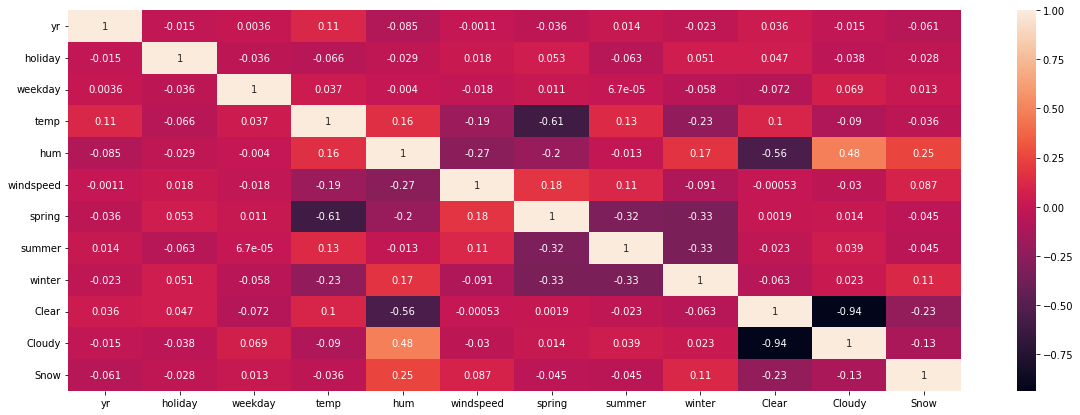

In [125]:
plt.figure(figsize=(20,7))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

# Model -6
## Dropping attribute 'Clear' as it has low significance when compared to others

In [126]:
X_train.drop('Clear', axis=1, inplace=True)
lr_6= createModel(X_train, y_train)
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     221.9
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          5.49e-184
Time:                        17:16:55   Log-Likelihood:                 491.22
No. Observations:                 510   AIC:                            -958.4
Df Residuals:                     498   BIC:                            -907.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2440      0.039      6.277      0.0

In [127]:
vif=pd.DataFrame()
getVIF(X_train, vif).sort_values(by='VIF', ascending=False)

,Features,VIF
4,hum,28.608162
3,temp,18.536513
5,windspeed,6.778726
2,weekday,4.608300
6,spring,3.822414
8,winter,3.049516
9,Cloudy,2.302076
7,summer,2.269959
0,yr,2.081028
10,Snow,1.239698


# Model -7
## Dropping attribute humidity due to high VIF

In [128]:
X_train.drop('hum', axis=1, inplace=True)
X_train_lm_7 = sm.add_constant(X_train)
lr_7=sm.OLS(y_train, X_train_lm_7).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.1
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          9.24e-183
Time:                        17:16:55   Log-Likelihood:                 485.48
No. Observations:                 510   AIC:                            -949.0
Df Residuals:                     499   BIC:                            -902.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1758      0.034      5.245      0.0

In [129]:
vif=pd.DataFrame()
getVIF(X_train, vif).sort_values(by='VIF', ascending=False)

,Features,VIF
4,windspeed,6.712788
3,temp,6.129498
2,weekday,4.587036
5,spring,2.369230
0,yr,2.069140
6,summer,1.899600
7,winter,1.797582
8,Cloudy,1.548616
9,Snow,1.079889
1,holiday,1.038454


# Model- 8
## Dropping attribute windspeed due to high VIF

In [130]:
X_train.drop('windspeed', axis=1, inplace=True)
X_train_lm_final = sm.add_constant(X_train)
lr_8=sm.OLS(y_train, X_train_lm_final).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     243.8
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.50e-176
Time:                        17:16:55   Log-Likelihood:                 467.97
No. Observations:                 510   AIC:                            -915.9
Df Residuals:                     500   BIC:                            -873.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1105      0.033      3.375      0.0

In [131]:
vif=pd.DataFrame()
getVIF(X_train, vif).sort_values(by='VIF', ascending=False)

,Features,VIF
2,weekday,4.566829
3,temp,4.499710
0,yr,2.066769
5,summer,1.599879
4,spring,1.584191
7,Cloudy,1.548337
6,winter,1.544876
8,Snow,1.065319
1,holiday,1.037693


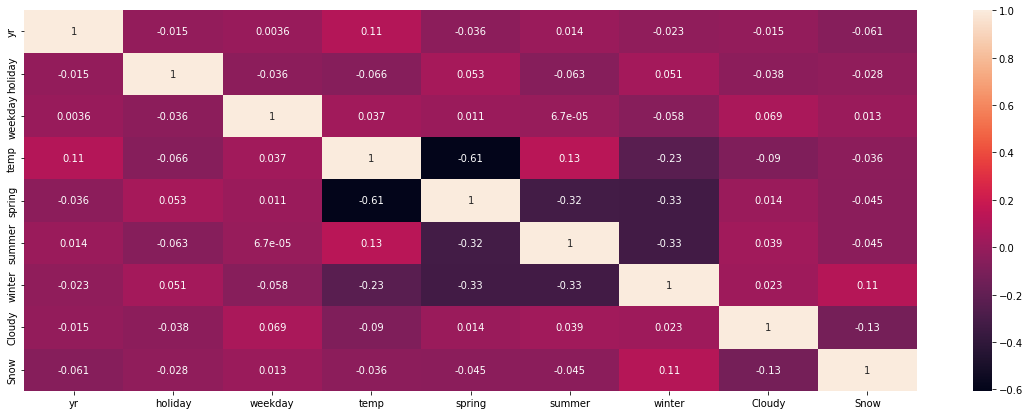

In [147]:
# checking correlation
plt.figure(figsize=(20,7))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

# Residual analysis of train data

In [133]:
y_train_count=lr_8.predict(X_train_lm_final)

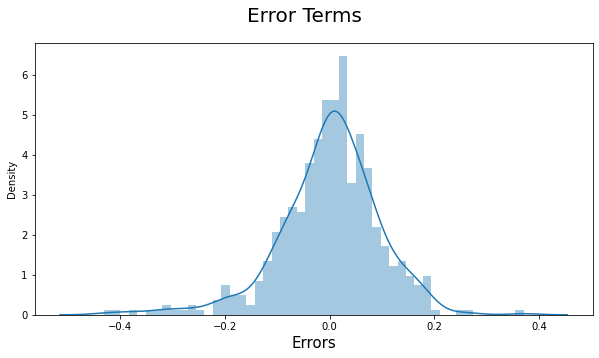

In [134]:
plt.figure(figsize=(10,5))
sns.distplot((y_train-y_train_count), bins=50)
plt.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=15)
plt.show()

# Prediction using final model

In [135]:
bs_test[['cnt']]=scaler.transform(bs_test[['cnt']])

In [136]:
columns_tobe_removed=['atemp','fall','mnth','workingday','Clear','hum','windspeed']
bs_test.drop(columns_tobe_removed, axis=1, inplace=True)

bs_test.describe()

,yr,holiday,weekday,temp,cnt,spring,summer,winter,Cloudy,Snow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,4.187215,20.815737,0.520592,0.255708,0.264840,0.232877,0.319635,0.027397
std,0.500722,0.188034,1.980784,7.689600,0.218435,0.437258,0.442259,0.423633,0.467403,0.163612
min,0.000000,0.000000,1.000000,3.957390,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,14.093750,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,4.000000,20.807500,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,6.000000,27.401653,0.672745,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,34.815847,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
y_test = bs_test.pop('cnt')
X_test = bs_test

In [138]:
# predict test data variable
X_test_lm=sm.add_constant(X_test)
y_pred=lr_8.predict(X_test_lm)

In [144]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
400    0.336516
702    0.757478
127    0.495973
640    0.868615
72     0.232858
Name: cnt, Length: 219, dtype: float64

<AxesSubplot:xlabel='cnt'>

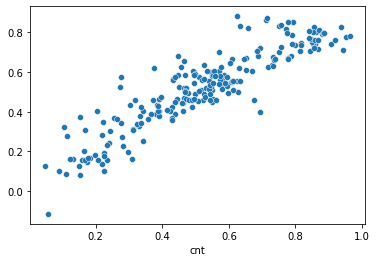

In [146]:
sns.scatterplot(x= y_test, y=y_pred)

In [139]:
# evaluate performance
print("For the test data set {0} % variation in output variable is explained by the input variable".format(round(r2_score(y_true=y_test, y_pred=y_pred)*100),2))

For the test data set 81 % variation in output variable is explained by the input variable


Text(0, 0.5, 'Predicted')

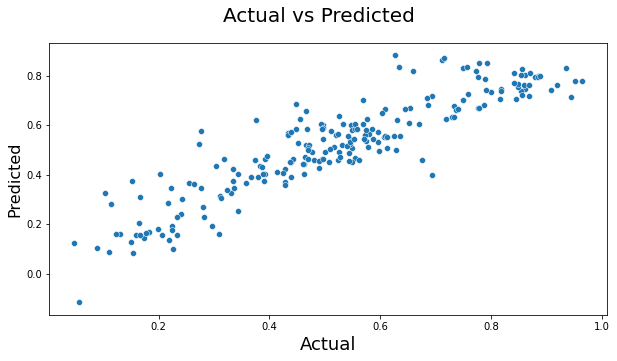

In [140]:
plt.figure(figsize=(10,5))
sns.scatterplot(y_test, y_pred)
plt.suptitle('Actual vs Predicted', fontsize = 20)
plt.xlabel('Actual', fontsize = 18)
plt.ylabel('Predicted', fontsize = 16)

# Equation for best fitted line is 

### $ count = 0.2330 * year + (-0.0875 * holiday) + 0.0072 * weekday + 0.0145 * temperature + (-0.0940 * spring) + 0.0265 * summer + 0.0781 * winter + (-0.0767 * cloudy) + (-0.2971 * snow)$ 